<a href="https://colab.research.google.com/github/Tahereh2/Machine-Learning/blob/main/amazon_review_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon Review (NLP)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/7817_1.csv")
data.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1597 non-null   object 
 1   asins                 1597 non-null   object 
 2   brand                 1597 non-null   object 
 3   categories            1597 non-null   object 
 4   colors                774 non-null    object 
 5   dateAdded             1597 non-null   object 
 6   dateUpdated           1597 non-null   object 
 7   dimension             565 non-null    object 
 8   ean                   898 non-null    float64
 9   keys                  1597 non-null   object 
 10  manufacturer          965 non-null    object 
 11  manufacturerNumber    902 non-null    object 
 12  name                  1597 non-null   object 
 13  prices                1597 non-null   object 
 14  reviews.date          1217 non-null   object 
 15  reviews.doRecommend  

In [ ]:
data=data.drop(["id" ,"asins","brand","categories","colors"],axis=1)

In [ ]:
data=data.drop(["ean" ,"dimension","dateAdded","dateUpdated","manufacturer","manufacturerNumber"],axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   keys                  1597 non-null   object 
 1   name                  1597 non-null   object 
 2   prices                1597 non-null   object 
 3   reviews.date          1217 non-null   object 
 4   reviews.doRecommend   539 non-null    object 
 5   reviews.numHelpful    900 non-null    float64
 6   reviews.rating        1177 non-null   float64
 7   reviews.sourceURLs    1597 non-null   object 
 8   reviews.text          1597 non-null   object 
 9   reviews.title         1580 non-null   object 
 10  reviews.userCity      0 non-null      float64
 11  reviews.userProvince  0 non-null      float64
 12  reviews.username      1580 non-null   object 
 13  sizes                 0 non-null      float64
 14  upc                   898 non-null    float64
 15  weight               

In [ ]:
data=data.drop(["weight","upc","sizes","reviews.userProvince","reviews.userCity","reviews.doRecommend"], axis=1)

In [ ]:
data.head()

,keys,name,prices,reviews.date,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username
0,kindlepaperwhite/b00qjdu3ky,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-08-08T00:00:00.000Z,139.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",Cristina M
1,kindlepaperwhite/b00qjdu3ky,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-09-01T00:00:00.000Z,126.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,Ricky
2,kindlepaperwhite/b00qjdu3ky,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-07-20T00:00:00.000Z,69.0,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,Tedd Gardiner
3,kindlepaperwhite/b00qjdu3ky,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2017-06-16T00:00:00.000Z,2.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,Dougal
4,kindlepaperwhite/b00qjdu3ky,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2016-08-11T00:00:00.000Z,17.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,Miljan David Tanic


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   keys                1597 non-null   object 
 1   name                1597 non-null   object 
 2   prices              1597 non-null   object 
 3   reviews.date        1217 non-null   object 
 4   reviews.numHelpful  900 non-null    float64
 5   reviews.rating      1177 non-null   float64
 6   reviews.sourceURLs  1597 non-null   object 
 7   reviews.text        1597 non-null   object 
 8   reviews.title       1580 non-null   object 
 9   reviews.username    1580 non-null   object 
dtypes: float64(2), object(8)
memory usage: 124.9+ KB


In [ ]:
data=data.drop(["keys","name","prices","reviews.date","reviews.numHelpful","reviews.sourceURLs"],axis=1)

In [ ]:
data.head()

,reviews.rating,reviews.text,reviews.title,reviews.username
0,5.0,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",Cristina M
1,5.0,Allow me to preface this with a little history...,One Simply Could Not Ask For More,Ricky
2,4.0,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,Tedd Gardiner
3,5.0,I bought one of the first Paperwhites and have...,Love / Hate relationship,Dougal
4,5.0,I have to say upfront - I don't like coroporat...,I LOVE IT,Miljan David Tanic


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   reviews.rating    1177 non-null   float64
 1   reviews.text      1597 non-null   object 
 2   reviews.title     1580 non-null   object 
 3   reviews.username  1580 non-null   object 
dtypes: float64(1), object(3)
memory usage: 50.0+ KB


In [ ]:
data.isnull().sum()

reviews.rating      420
reviews.text          0
reviews.title        17
reviews.username     17
dtype: int64

In [ ]:
data["reviews.rating"].unique()

array([ 5.,  4., nan,  3.,  1.,  2.])

In [ ]:
data["reviews.rating"].value_counts()

5.0    741
4.0    236
3.0    124
1.0     42
2.0     34
Name: reviews.rating, dtype: int64

In [ ]:
data["reviews.rating"]=data["reviews.rating"].fillna(5.)

In [ ]:
data["reviews.rating"]=data["reviews.rating"].astype("int")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   reviews.rating    1597 non-null   int64 
 1   reviews.text      1597 non-null   object
 2   reviews.title     1580 non-null   object
 3   reviews.username  1580 non-null   object
dtypes: int64(1), object(3)
memory usage: 50.0+ KB


In [ ]:
data=data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1580 entries, 0 to 1596
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   reviews.rating    1580 non-null   int64 
 1   reviews.text      1580 non-null   object
 2   reviews.title     1580 non-null   object
 3   reviews.username  1580 non-null   object
dtypes: int64(1), object(3)
memory usage: 61.7+ KB


In [ ]:
#ratings that customers have given to the product based on their experience with the product
ratings = data["reviews.rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

In [ ]:
numbers

Int64Index([5, 4, 3, 1, 2], dtype='int64')

In [ ]:
quantity

array([1144,  236,  124,   42,   34])

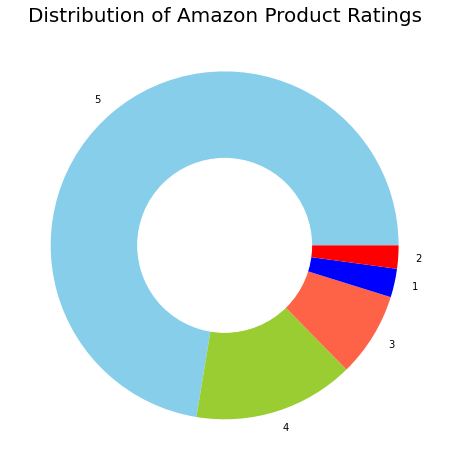

In [ ]:
custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Amazon Product Ratings", fontsize=20)
plt.show()

In [ ]:
#add three more columns to this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the customer reviews mentioned in the Text column of the datase
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sentiments =SentimentIntensityAnalyzer()

data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["reviews.text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["reviews.text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["reviews.text"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


   reviews.rating                                       reviews.text  \
0               5  I initially had trouble deciding between the p...   
1               5  Allow me to preface this with a little history...   
2               4  I am enjoying it so far. Great for reading. Ha...   
3               5  I bought one of the first Paperwhites and have...   
4               5  I have to say upfront - I don't like coroporat...   

                                reviews.title    reviews.username  Positive  \
0              Paperwhite voyage, no regrets!          Cristina M     0.169   
1           One Simply Could Not Ask For More               Ricky     0.147   
2  Great for those that just want an e-reader       Tedd Gardiner     0.223   
3                    Love / Hate relationship              Dougal     0.105   
4                                   I LOVE IT  Miljan David Tanic     0.195   

   Negative  Neutral  
0     0.038    0.793  
1     0.041    0.812  
2     0.181    0.596  


In [ ]:
#checking how most people rated the products they bought from Amazon

x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [ ]:
#checking the total of all sentiment scores

print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  317.9730000000015
Negative:  66.22099999999998
Neutral:  1195.7950000000017


In [ ]:
sentiment =SentimentIntensityAnalyzer()

data["Positives"] = [sentiment.polarity_scores(i)["pos"] for i in data["reviews.title"]]
data["Negatives"] = [sentiment.polarity_scores(i)["neg"] for i in data["reviews.title"]]
data["Neutrals"] = [sentiment.polarity_scores(i)["neu"] for i in data["reviews.title"]]
print(data.head())

   reviews.rating                                       reviews.text  \
0               5  I initially had trouble deciding between the p...   
1               5  Allow me to preface this with a little history...   
2               4  I am enjoying it so far. Great for reading. Ha...   
3               5  I bought one of the first Paperwhites and have...   
4               5  I have to say upfront - I don't like coroporat...   

                                reviews.title    reviews.username  Positive  \
0              Paperwhite voyage, no regrets!          Cristina M     0.169   
1           One Simply Could Not Ask For More               Ricky     0.147   
2  Great for those that just want an e-reader       Tedd Gardiner     0.223   
3                    Love / Hate relationship              Dougal     0.105   
4                                   I LOVE IT  Miljan David Tanic     0.195   

   Negative  Neutral  Positives  Negatives  Neutrals  
0     0.038    0.793      0.000      

In [ ]:
t = sum(data["Positives"])
h = sum(data["Negatives"])
d = sum(data["Neutrals"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positives 😊 ")
    elif (b>a) and (b>c):
        print("Negatives 😠 ")
    else:
        print("Neutrals 🙂 ")
sentiment_score(t, h, d)

Neutrals 🙂 


In [ ]:
print("Positives: ", t)
print("Negatives: ", h)
print("Neutrals: ", d)

Positives:  637.9129999999981
Negatives:  101.45699999999964
Neutrals:  840.5970000000023
